# Upstage 

### 파일 분할

In [80]:
import pymupdf
import os

file_path = "C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/samsung.pdf"


input_pdf = pymupdf.open(file_path)
num_pages = len(input_pdf)
print(f"총 페이지 수: {num_pages}")

batch_size = 10

output_dir = 'C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs'
os.makedirs(output_dir,exist_ok=True)

ret = []
base_name = os.path.splitext(os.path.basename(file_path))[0]

# PDF 분할
for start_page in range(0, num_pages, batch_size):
    end_page = min(start_page + batch_size, num_pages) - 1
    output_file = os.path.join(output_dir, f"{base_name}_{start_page:04d}_{end_page:04d}.pdf")
    print(f"분할 PDF 생성: {output_file}")

    with pymupdf.open() as output_pdf:
        output_pdf.insert_pdf(input_pdf, from_page=start_page, to_page=end_page)
        output_pdf.save(output_file)
        ret.append(output_file)

# 입력 PDF 파일 닫기
input_pdf.close()

총 페이지 수: 53
분할 PDF 생성: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs\samsung_0000_0009.pdf
분할 PDF 생성: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs\samsung_0010_0019.pdf
분할 PDF 생성: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs\samsung_0020_0029.pdf
분할 PDF 생성: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs\samsung_0030_0039.pdf
분할 PDF 생성: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs\samsung_0040_0049.pdf
분할 PDF 생성: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs\samsung_0050_0052.pdf


### layout 수행

In [81]:
import requests
from dotenv import load_dotenv
import json

# .env 파일에서 API 키 로드
load_dotenv()
analyzer_api = os.environ.get("UPSTAGE_API_KEY")

# 분할된 PDF 파일이 저장된 폴더
split_docs_folder = "C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs"
output_folder = "C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/analysis_results"

# 출력 폴더 생성 (없으면 생성)
os.makedirs(output_folder, exist_ok=True)

# Upstage API URL
api_url = "https://api.upstage.ai/v1/document-ai/layout-analysis"

# split_docs 폴더 내의 모든 PDF 파일 가져오기
pdf_files = [f for f in os.listdir(split_docs_folder) if f.endswith(".pdf")]

# API 요청을 보내고 결과 저장
for pdf_file in pdf_files:
    file_path = os.path.join(split_docs_folder, pdf_file)
    output_json_path = os.path.join(output_folder, f"{os.path.splitext(pdf_file)[0]}.json")

    print(f"📤 파일 업로드 중: {pdf_file}")

    with open(file_path, "rb") as pdf:
        response = requests.post(
            api_url,
            headers={"Authorization": f"Bearer {analyzer_api}"},
            data={"ocr": False},  # OCR 기능 사용 여부 (필요하면 True로 변경)
            files={"document": pdf}
        )

    # 응답 확인
    if response.status_code == 200:
        result = response.json()
        
        # JSON 결과 저장
        with open(output_json_path, "w", encoding="utf-8") as json_file:
            json.dump(result, json_file, ensure_ascii=False, indent=4)

        print(f"✅ 분석 결과 저장 완료: {output_json_path}")
    else:
        print(f"❌ 오류 발생 ({response.status_code}): {response.text}")

print("🎉 모든 파일 분석 완료!")

📤 파일 업로드 중: samsung_0000_0009.pdf
✅ 분석 결과 저장 완료: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/analysis_results\samsung_0000_0009.json
📤 파일 업로드 중: samsung_0010_0019.pdf
✅ 분석 결과 저장 완료: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/analysis_results\samsung_0010_0019.json
📤 파일 업로드 중: samsung_0020_0029.pdf
✅ 분석 결과 저장 완료: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/analysis_results\samsung_0020_0029.json
📤 파일 업로드 중: samsung_0030_0039.pdf
✅ 분석 결과 저장 완료: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/analysis_results\samsung_0030_0039.json
📤 파일 업로드 중: samsung_0040_0049.pdf
✅ 분석 결과 저장 완료: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/analysis_results\samsung_0040_0049.json
📤 파일 업로드 중: samsung_0050_0052.pdf
✅ 분석 결과 저장 완료: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/analysis_results\samsung_0050_0052.json
🎉 모든 파일 분석 완료!


# 그래프 노드(함수)

In [1]:
import os
from graphparser.state import GraphState
import graphparser.core as parser_core
from dotenv import load_dotenv
import graphparser.pdf as pdf

load_dotenv()

# # 문서 분할
split_pdf_node = pdf.SplitPDFFilesNode(batch_size=10)

# Layout Analyzer
layout_analyze_node = parser_core.LayoutAnalyzerNode(os.environ.get("UPSTAGE_API_KEY"))

# 페이지 요소 추출
page_element_extractor_node = parser_core.ExtractPageElementsNode()

# 이미지 자르기
image_cropper_node = parser_core.ImageCropperNode()

# 테이블 자르기
table_cropper_node = parser_core.TableCropperNode()

# 페이지별 텍스트 추출
extract_page_text = parser_core.ExtractPageTextNode()

# # 페이지별 요약
# page_summary_node = parser_core.CreatePageSummaryNode(
#     api_key=os.environ.get("OPENAI_API_KEY")
# )

# # 이미지 요약
# image_summary_node = parser_core.CreateImageSummaryNode(
#     api_key=os.environ.get("OPENAI_API_KEY")
# )

# # 테이블 요약
# table_summary_node = parser_core.CreateTableSummaryNode(
#     api_key=os.environ.get("OPENAI_API_KEY")
# )

# # 테이블 Markdown 추출
# table_markdown_extractor = parser_core.TableMarkdownExtractorNode()

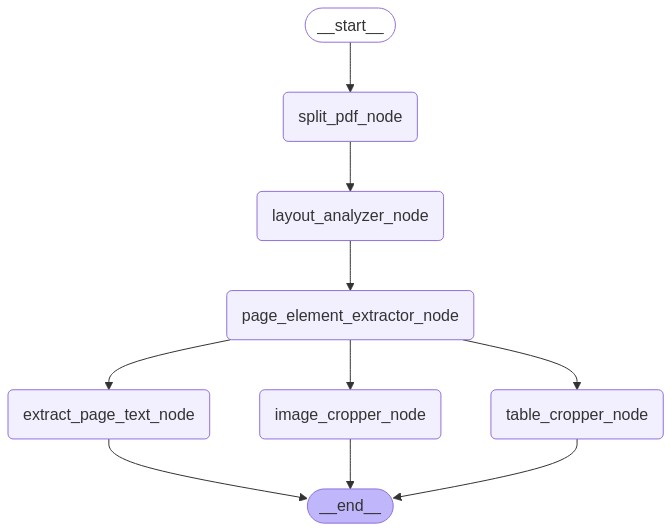

In [2]:
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

# LangGraph을 생성
workflow = StateGraph(GraphState)

# 노드들을 정의합니다.
workflow.add_node("split_pdf_node", split_pdf_node)
workflow.add_node("layout_analyzer_node", layout_analyze_node)
workflow.add_node("page_element_extractor_node", page_element_extractor_node)
workflow.add_node("image_cropper_node", image_cropper_node)
workflow.add_node("table_cropper_node", table_cropper_node)
workflow.add_node("extract_page_text_node", extract_page_text)
# workflow.add_node("page_summary_node", page_summary_node)
# workflow.add_node("image_summary_node", image_summary_node)
# workflow.add_node("table_summary_node", table_summary_node)
# workflow.add_node("table_markdown_node", table_markdown_extractor)

# 각 노드들을 연결합니다.
workflow.add_edge("split_pdf_node", "layout_analyzer_node")
workflow.add_edge("layout_analyzer_node", "page_element_extractor_node")
workflow.add_edge("page_element_extractor_node", "image_cropper_node")
workflow.add_edge("page_element_extractor_node", "table_cropper_node")
workflow.add_edge("page_element_extractor_node", "extract_page_text_node")

workflow.add_edge("image_cropper_node", END)
workflow.add_edge("table_cropper_node", END)
workflow.add_edge("extract_page_text_node", END)
# workflow.add_edge("image_cropper_node", "page_summary_node")
# workflow.add_edge("table_cropper_node", "page_summary_node")
# workflow.add_edge("extract_page_text_node", "page_summary_node")
# workflow.add_edge("page_summary_node", "image_summary_node")
# workflow.add_edge("page_summary_node", "table_summary_node")
# workflow.add_edge("image_summary_node", END)
# workflow.add_edge("table_summary_node", "table_markdown_node")
# workflow.add_edge("table_markdown_node", END)

workflow.set_entry_point("split_pdf_node")

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

try:
    display(
        Image(app.get_graph(xray=True).draw_mermaid_png())
    )  # 실행 가능한 객체의 그래프를 mermaid 형식의 PNG로 그려서 표시합니다. xray=True는 추가적인 세부 정보를 포함합니다.
except:
    # 이 부분은 추가적인 의존성이 필요하며 선택적으로 실행됩니다.
    pass

In [ ]:
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


# GraphState 상태를 저장하는 용도로 사용합니다.
class GraphState(TypedDict):
    filepath: str  # path
    filetype: str  # pdf
    page_numbers: list[int]  # page numbers
    # batch_size: int  # batch size
    # split_filepaths: list[str]  # split files
    analyzed_files: str   # analyzed files
    page_elements: Annotated[dict[int, dict[str, list[dict]]], add_messages] # page elements
    page_metadata: dict[int, dict]   # page metadata
    # page_summary: dict[int, str]  # page summary
    images: list[str]  # image paths
    # images_summary: list[str]  # image summary
    tables: list[str]  # table
    # tables_summary: dict[int, str]  # table summary
    texts: list[str]  # text
    # texts_summary: list[str]  # text summary

json_file_path = 'C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/analysis_results/samsung_0000_0009.json'
pdf_file_path = 'C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs/samsung_0000_0009.pdf'

state = GraphState(filepath = pdf_file_path,
                   filetype = 'pdf',
                   analyzed_files=json_file_path)

# Langgraph 플로우
graph = StateGraph(GraphState)

### 페이지 메타데이터 추출

In [ ]:
# 페이지 메타데이터 추출
import re

def extract_start_end_page(filename):
    """
    파일 이름에서 시작 페이지와 끝 페이지 번호를 추출하는 함수입니다.

    :param filename: 분석할 파일의 이름
    :return: 시작 페이지 번호와 끝 페이지 번호를 튜플로 반환
    """
    # 파일 경로에서 파일 이름만 추출
    file_name = os.path.basename(filename)
    # 파일 이름을 '_' 기준으로 분리
    file_name_parts = file_name.split("_")

    if len(file_name_parts) >= 3:
        # 파일 이름의 뒤에서 두 번째 부분에서 숫자를 추출하여 시작 페이지로 설정
        start_page = int(re.findall(r"(\d+)", file_name_parts[-2])[0])
        # 파일 이름의 마지막 부분에서 숫자를 추출하여 끝 페이지로 설정
        end_page = int(re.findall(r"(\d+)", file_name_parts[-1])[0])
    else:
        # 파일 이름 형식이 예상과 다를 경우 기본값 설정
        start_page, end_page = 0, 0

    return start_page, end_page

def extract_tag_elements_per_page(page_elements):
    # 파싱된 페이지 요소들을 저장할 새로운 딕셔너리를 생성합니다.
    parsed_page_elements = dict()

    # 각 페이지와 해당 페이지의 요소들을 순회합니다.
    for key, page_element in page_elements.items():
        # 이미지, 테이블, 텍스트 요소들을 저장할 리스트를 초기화합니다.
        image_elements = []
        table_elements = []
        text_elements = []

        # 페이지의 각 요소를 순회하며 카테고리별로 분류합니다.
        for element in page_element:
            if element["category"] == "figure":
                # 이미지 요소인 경우 image_elements 리스트에 추가합니다.
                image_elements.append(element)
            elif element["category"] == "table":
                # 테이블 요소인 경우 table_elements 리스트에 추가합니다.
                table_elements.append(element)
            else:
                # 그 외의 요소는 모두 텍스트 요소로 간주하여 text_elements 리스트에 추가합니다.
                text_elements.append(element)

        # 분류된 요소들을 페이지 키와 함께 새로운 딕셔너리에 저장합니다.
        parsed_page_elements[key] = {
            "image_elements": image_elements,
            "table_elements": table_elements,
            "text_elements": text_elements,
            "elements": page_element,  # 원본 페이지 요소도 함께 저장합니다.
        }

    return parsed_page_elements

# 노드 함수: JSON 파일에서 페이지 메타데이터와 페이지 요소를 추출하여 상태를 업데이트합니다.
def extract_page_metadata(state: GraphState) -> GraphState:
    json_files = state["analyzed_files"]
    page_metadata = dict()
    page_elements = dict()
    element_id = 0

    for json_file in json_files:
        with open(json_file, "r") as f:
            data = json.load(f)
        start_page, _ = extract_start_end_page(json_file)

        # 페이지 메타데이터 추출
        for element in data["metadata"]["pages"]:
            original_page = int(element["page"])
            relative_page = start_page + original_page - 1
            metadata = {
                "size": [int(element["width"]), int(element["height"])]
            }
            page_metadata[relative_page] = metadata

        # 페이지 요소 추출
        for element in data["elements"]:
            original_page = int(element["page"])
            relative_page = start_page + original_page - 1
            if relative_page not in page_elements:
                page_elements[relative_page] = []
            element["id"] = element_id
            element_id += 1
            element["page"] = relative_page
            page_elements[relative_page].append(element)

    parsed_page_elements = extract_tag_elements_per_page(page_elements)
    page_numbers = list(parsed_page_elements.keys())

    # 기존 state의 다른 필드는 그대로 유지하고, 업데이트할 필드만 덮어씌웁니다.
    new_state = dict(state)
    new_state["page_metadata"] = page_metadata
    new_state["page_elements"] = parsed_page_elements
    new_state["page_numbers"] = page_numbers
    return new_state

In [111]:
state_out = extract_page_metadata(state)
state.update(state_out)
state["page_metadata"]

# langgraph
graph.add_node("extract_page_metadata", extract_page_metadata)

graph.add_edge(START, "extract_page_metadata")

In [113]:
state["page_elements"][0]

KeyError: 'page_elements'

### 페이지별 HTML element 추출

In [89]:
# 페이지별 HTML element 추출

def extract_page_elements(state: GraphState):
    # 분석된 JSON 파일 목록을 가져옵니다.
    json_file = state["analyzed_files"]

    # 페이지별 요소를 저장할 딕셔너리를 초기화합니다.
    page_elements = dict()

    # 전체 문서에서 고유한 요소 ID를 부여하기 위한 카운터입니다.
    element_id = 0

    # # 각 JSON 파일을 순회하며 처리합니다.
    # for json_file in json_files:
    # 파일명에서 시작 페이지 번호를 추출합니다.
    start_page, _ = extract_start_end_page(json_file)

    # JSON 파일을 열어 데이터를 로드합니다.
    with open(json_file, "r") as f:
        data = json.load(f)

    # JSON 데이터의 각 요소를 처리합니다.
    for element in data["elements"]:
        # 원본 페이지 번호를 정수로 변환합니다.
        original_page = int(element["page"])
        # 전체 문서 기준의 상대적 페이지 번호를 계산합니다.
        relative_page = start_page + original_page - 1

        # 해당 페이지의 요소 리스트가 없으면 새로 생성합니다.
        if relative_page not in page_elements:
            page_elements[relative_page] = []

        # 요소에 고유 ID를 부여합니다.
        element["id"] = element_id
        element_id += 1

        # 요소의 페이지 번호를 상대적 페이지 번호로 업데이트합니다.
        element["page"] = relative_page
        # 요소를 해당 페이지의 리스트에 추가합니다.
        page_elements[relative_page].append(element)

    # 추출된 페이지별 요소 정보로 새로운 GraphState 객체를 생성하여 반환합니다.
    return GraphState(page_elements=page_elements)

In [102]:
state_out = extract_page_elements(state)
state.update(state_out)
state["page_elements"][0]

[{'bounding_box': [{'x': 893, 'y': 279},
   {'x': 1176, 'y': 279},
   {'x': 1176, 'y': 390},
   {'x': 893, 'y': 390}],
  'category': 'heading1',
  'html': "<h1 id='0' style='font-size:18px'>SM-W707N0<br>SM-W708N0</h1>",
  'id': 0,
  'page': 0,
  'text': 'SM-W707N0\nSM-W708N0'},
 {'bounding_box': [{'x': 336, 'y': 599},
   {'x': 899, 'y': 599},
   {'x': 899, 'y': 727},
   {'x': 336, 'y': 727}],
  'category': 'heading1',
  'html': "<h1 id='1' style='font-size:20px'>사용 설명서</h1>",
  'id': 1,
  'page': 0,
  'text': '사용 설명서'},
 {'bounding_box': [{'x': 64, 'y': 1629},
   {'x': 239, 'y': 1629},
   {'x': 239, 'y': 1663},
   {'x': 64, 'y': 1663}],
  'category': 'footer',
  'html': "<footer id='2' style='font-size:14px'>04/2016 Rev.1.1</footer>",
  'id': 2,
  'page': 0,
  'text': '04/2016 Rev.1.1'},
 {'bounding_box': [{'x': 904, 'y': 1632},
   {'x': 1173, 'y': 1632},
   {'x': 1173, 'y': 1662},
   {'x': 904, 'y': 1662}],
  'category': 'footer',
  'html': "<br><footer id='3' style='font-size:16px'>w

In [101]:
state["page_elements"].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
# langgraph
graph.add_node("extract_page_elements", extract_page_elements)

graph.add_edge("extract_page_metadata", "extract_page_elements")

### 각 페이지의 태그를 분해
- images,tables,text 분해

In [103]:
# 각 페이지의 태그를 분해
    # images,tables,text 분해

def extract_tag_elements_per_page(state: GraphState):
    # GraphState 객체에서 페이지 요소들을 가져옵니다.
    page_elements = state["page_elements"]

    # 파싱된 페이지 요소들을 저장할 새로운 딕셔너리를 생성합니다.
    parsed_page_elements = dict()

    # 각 페이지와 해당 페이지의 요소들을 순회합니다.
    for key, page_element in page_elements.items():
        # 이미지, 테이블, 텍스트 요소들을 저장할 리스트를 초기화합니다.
        image_elements = []
        table_elements = []
        text_elements = []

        # 페이지의 각 요소를 순회하며 카테고리별로 분류합니다.
        for element in page_element:
            if element["category"] == "figure":
                # 이미지 요소인 경우 image_elements 리스트에 추가합니다.
                image_elements.append(element)
            elif element["category"] == "table":
                # 테이블 요소인 경우 table_elements 리스트에 추가합니다.
                table_elements.append(element)
            else:
                # 그 외의 요소는 모두 텍스트 요소로 간주하여 text_elements 리스트에 추가합니다.
                text_elements.append(element)

        # 분류된 요소들을 페이지 키와 함께 새로운 딕셔너리에 저장합니다.
        parsed_page_elements[key] = {
            "image_elements": image_elements,
            "table_elements": table_elements,
            "text_elements": text_elements,
            "elements": page_element,  # 원본 페이지 요소도 함께 저장합니다.
        }

    # 파싱된 페이지 요소들을 포함한 새로운 GraphState 객체를 반환합니다.
    return GraphState(page_elements=parsed_page_elements)

In [105]:
state_out = extract_tag_elements_per_page(state)
state.update(state_out)

In [95]:
state["page_elements"].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [96]:
state["page_elements"][0].keys()

dict_keys(['image_elements', 'table_elements', 'text_elements', 'elements'])

In [106]:
state["page_elements"][0]

{'image_elements': [],
 'table_elements': [],
 'text_elements': [{'bounding_box': [{'x': 893, 'y': 279},
    {'x': 1176, 'y': 279},
    {'x': 1176, 'y': 390},
    {'x': 893, 'y': 390}],
   'category': 'heading1',
   'html': "<h1 id='0' style='font-size:18px'>SM-W707N0<br>SM-W708N0</h1>",
   'id': 0,
   'page': 0,
   'text': 'SM-W707N0\nSM-W708N0'},
  {'bounding_box': [{'x': 336, 'y': 599},
    {'x': 899, 'y': 599},
    {'x': 899, 'y': 727},
    {'x': 336, 'y': 727}],
   'category': 'heading1',
   'html': "<h1 id='1' style='font-size:20px'>사용 설명서</h1>",
   'id': 1,
   'page': 0,
   'text': '사용 설명서'},
  {'bounding_box': [{'x': 64, 'y': 1629},
    {'x': 239, 'y': 1629},
    {'x': 239, 'y': 1663},
    {'x': 64, 'y': 1663}],
   'category': 'footer',
   'html': "<footer id='2' style='font-size:14px'>04/2016 Rev.1.1</footer>",
   'id': 2,
   'page': 0,
   'text': '04/2016 Rev.1.1'},
  {'bounding_box': [{'x': 904, 'y': 1632},
    {'x': 1173, 'y': 1632},
    {'x': 1173, 'y': 1662},
    {'x': 90

In [98]:
# langgraph
graph.add_node("extract_tag_elements_per_page", extract_tag_elements_per_page)

graph.add_edge("extract_page_elements", "extract_tag_elements_per_page")

### 페이지 번호 추출

In [107]:
# 페이지 번호 추출
def page_numbers(state: GraphState):
    return GraphState(page_numbers=list(state["page_elements"].keys()))


state_out = page_numbers(state)
state.update(state_out)
state["page_numbers"]

# # langgraph
# graph.add_node("extract_page_numbers", page_numbers)

# graph.add_edge("extract_page_elements", "extract_page_numbers")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [54]:
# 이미지 추출
from PIL import Image

class ImageCropper:
    @staticmethod
    def pdf_to_image(pdf_file, page_num, dpi=300):
        """
        PDF 파일의 특정 페이지를 이미지로 변환하는 메서드

        :param page_num: 변환할 페이지 번호 (1부터 시작)
        :param dpi: 이미지 해상도 (기본값: 300)
        :return: 변환된 이미지 객체
        """
        with pymupdf.open(pdf_file) as doc:
            page = doc[page_num].get_pixmap(dpi=dpi)
            target_page_size = [page.width, page.height]
            page_img = Image.frombytes("RGB", target_page_size, page.samples)
        return page_img

    @staticmethod
    def normalize_coordinates(coordinates, output_page_size):
        """
        좌표를 정규화하는 정적 메서드

        :param coordinates: 원본 좌표 리스트
        :param output_page_size: 출력 페이지 크기 [너비, 높이]
        :return: 정규화된 좌표 (x1, y1, x2, y2)
        """
        x_values = [coord["x"] for coord in coordinates]
        y_values = [coord["y"] for coord in coordinates]
        x1, y1, x2, y2 = min(x_values), min(y_values), max(x_values), max(y_values)

        return (
            x1 / output_page_size[0],
            y1 / output_page_size[1],
            x2 / output_page_size[0],
            y2 / output_page_size[1],
        )

    @staticmethod
    def crop_image(img, coordinates, output_file):
        """
        이미지를 주어진 좌표에 따라 자르고 저장하는 정적 메서드

        :param img: 원본 이미지 객체
        :param coordinates: 정규화된 좌표 (x1, y1, x2, y2)
        :param output_file: 저장할 파일 경로
        """
        img_width, img_height = img.size
        x1, y1, x2, y2 = [
            int(coord * dim)
            for coord, dim in zip(coordinates, [img_width, img_height] * 2)
        ]
        cropped_img = img.crop((x1, y1, x2, y2))
        cropped_img.save(output_file)

In [51]:
sample_image = state["page_elements"][4]["image_elements"][0]
sample_image

{'bounding_box': [{'x': 218, 'y': 327},
  {'x': 1017, 'y': 327},
  {'x': 1017, 'y': 1183},
  {'x': 218, 'y': 1183}],
 'category': 'figure',
 'html': '<br><figure id=\'30\'><img style=\'font-size:14px\' alt="음량 버튼 마이크\n전원 버튼 조도 센서\n마이크\n전면 카메라\n카메라 동작 표시등\n스피커\n터치 화면\n외부 커넥터 연결잭\n(USB Type-C™)\n스테레오 이어폰\n키보드 연결부\n연결잭\n메인 안테나\nNFC 안테나\n시작 버튼\n후면 카메라\n스피커\nNano-SIM 카드\n삽입구" data-coord="top-left:(218,327); bottom-right:(1017,1183)" /></figure>',
 'id': 30,
 'page': 4,
 'text': '음량 버튼 마이크\n전원 버튼 조도 센서\n마이크\n전면 카메라\n카메라 동작 표시등\n스피커\n터치 화면\n외부 커넥터 연결잭\n(USB Type-C™)\n스테레오 이어폰\n키보드 연결부\n연결잭\n메인 안테나\nNFC 안테나\n시작 버튼\n후면 카메라\n스피커\nNano-SIM 카드\n삽입구'}

In [55]:
def crop_image(state: GraphState):
    """
    PDF 파일에서 이미지를 추출하고 크롭하는 함수

    :param state: GraphState 객체
    :return: 크롭된 이미지 정보가 포함된 GraphState 객체
    """
    pdf_file = state["filepath"]  # PDF 파일 경로
    page_numbers = state["page_numbers"]  # 처리할 페이지 번호 목록
    output_folder = os.path.splitext(pdf_file)[0]  # 출력 폴더 경로 설정
    os.makedirs(output_folder, exist_ok=True)  # 출력 폴더 생성

    cropped_images = dict()  # 크롭된 이미지 정보를 저장할 딕셔너리
    for page_num in page_numbers:
        pdf_image = ImageCropper.pdf_to_image(
            pdf_file, page_num
        )  # PDF 페이지를 이미지로 변환
        for element in state["page_elements"][page_num]["image_elements"]:
            if element["category"] == "figure":
                # 이미지 요소의 좌표를 정규화
                normalized_coordinates = ImageCropper.normalize_coordinates(
                    element["bounding_box"], state["page_metadata"][page_num]["size"]
                )

                # 크롭된 이미지 저장 경로 설정
                output_file = os.path.join(output_folder, f"{element['id']}.png")
                # 이미지 크롭 및 저장
                ImageCropper.crop_image(pdf_image, normalized_coordinates, output_file)
                cropped_images[element["id"]] = output_file
                print(f"page:{page_num}, id:{element['id']}, path: {output_file}")
    return GraphState(
        images=cropped_images
    )  # 크롭된 이미지 정보를 포함한 GraphState 반환


def crop_table(state: GraphState):
    """
    PDF 파일에서 표를 추출하고 크롭하는 함수

    :param state: GraphState 객체
    :return: 크롭된 표 이미지 정보가 포함된 GraphState 객체
    """
    pdf_file = state["filepath"]  # PDF 파일 경로
    page_numbers = state["page_numbers"]  # 처리할 페이지 번호 목록
    output_folder = os.path.splitext(pdf_file)[0]  # 출력 폴더 경로 설정
    os.makedirs(output_folder, exist_ok=True)  # 출력 폴더 생성

    cropped_images = dict()  # 크롭된 표 이미지 정보를 저장할 딕셔너리
    for page_num in page_numbers:
        pdf_image = ImageCropper.pdf_to_image(
            pdf_file, page_num
        )  # PDF 페이지를 이미지로 변환
        for element in state["page_elements"][page_num]["table_elements"]:
            if element["category"] == "table":
                # 표 요소의 좌표를 정규화
                normalized_coordinates = ImageCropper.normalize_coordinates(
                    element["bounding_box"], state["page_metadata"][page_num]["size"]
                )

                # 크롭된 표 이미지 저장 경로 설정
                output_file = os.path.join(output_folder, f"{element['id']}.png")
                # 표 이미지 크롭 및 저장
                ImageCropper.crop_image(pdf_image, normalized_coordinates, output_file)
                cropped_images[element["id"]] = output_file
                print(f"page:{page_num}, id:{element['id']}, path: {output_file}")
    return GraphState(
        tables=cropped_images
    )  # 크롭된 표 이미지 정보를 포함한 GraphState 반환

In [56]:
state_out = crop_image(state)
state.update(state_out)
state["images"]

page:4, id:30, path: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs/samsung_0000_0009\30.png
page:6, id:50, path: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs/samsung_0000_0009\50.png
page:9, id:85, path: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs/samsung_0000_0009\85.png


{30: 'C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs/samsung_0000_0009\\30.png',
 50: 'C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs/samsung_0000_0009\\50.png',
 85: 'C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs/samsung_0000_0009\\85.png'}

In [57]:
state_out = crop_table(state)
state.update(state_out)
state["tables"]

page:5, id:39, path: C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs/samsung_0000_0009\39.png


{39: 'C:/Users/user/Desktop/BOAZ_ADV/Wang_Gyu/split_docs/samsung_0000_0009\\39.png'}

### 페이지 텍스트 추출

In [58]:
def extract_page_text(state: GraphState):
    # 상태 객체에서 페이지 번호 목록을 가져옵니다.
    page_numbers = state["page_numbers"]

    # 추출된 텍스트를 저장할 딕셔너리를 초기화합니다.
    extracted_texts = dict()

    # 각 페이지 번호에 대해 반복합니다.
    for page_num in page_numbers:
        # 현재 페이지의 텍스트를 저장할 빈 문자열을 초기화합니다.
        extracted_texts[page_num] = ""

        # 현재 페이지의 모든 텍스트 요소에 대해 반복합니다.
        for element in state["page_elements"][page_num]["text_elements"]:
            # 각 텍스트 요소의 내용을 현재 페이지의 텍스트에 추가합니다.
            extracted_texts[page_num] += element["text"]

    # 추출된 텍스트를 포함한 새로운 GraphState 객체를 반환합니다.
    return GraphState(texts=extracted_texts)

In [59]:
state_out = extract_page_text(state)
state.update(state_out)
state["texts"]

{0: 'SM-W707N0\nSM-W708N0사용 설명서04/2016 Rev.1.1www.samsung.com/sec',
 1: '차례 보기기본 기능설정3 사용하기 전에 36 설정 소개\n4 구성품 확인 36 시스템\n5 각 부분의 이름 37 장치\n7 배터리 충전 37 네트워크 및 인터넷\n10 Nano-SIM 카드 38 개인 설정\n12 전원 켜기/끄기 38 계정\n12 키보드 커버 39 시간 및 언어\n18 터치 화면 39 접근성\n20 시작 화면 40 개인 정보\n23 잠금 화면 41 업데이트 및 복구\n24 알림 센터 41 Extras\n26 검색창 42 BIOS(설정 유틸리티)\n26 문자 입력\n28 화면 캡처\n28 애플리케이션 실행 부록\n29 화면 분할 45 서비스를 요청하기 전에\n30 제품 및 데이터 관리 49 English Quick Guide\n30 InstantGo(Connected standby) 50 규격 및 특성애플리케이션31 애플리케이션 설치 및 삭제\n32 Scrap Box\n32 Samsung Update\n33 Samsung Recovery\n34 온라인 상담(S Service)\n34 Show Window2',
 2: '기본 기능사용하기 전에사용 전 반드시 이 사용 설명서를 읽고 제품을 안전하고 올바르게 사용하세요.• \t 이 사용 설명서는 제품의 기본 설정 값을 기준으로 설명합니다.\n• \t 사용 설명서의 내용은 제품의 소프트웨어 버전 또는 통신사 사정, 모델의 사양에 따라 실제와 다를 수\n있습니다.\n• \t 높은 CPU 및 RAM을 사용하는 기능(높은 품질의 콘텐츠 등)을 실행할 경우 제품의 전체 성능에 영향을\n미칠 수 있습니다.\n• \t 삼성전자에서 제공하지 않은 애플리케이션을 설치하여 문제가 발생한 경우 보증 서비스가 적용되지\n않습니다.\n• \t 사용자가 임의로 레지스트리 설정이나 운영 체제 소프트웨어를 수정하여 기능 및 호환성에 문제가\n발생한 경우 보증 서비스가 적용되지 않습니다. 사용자 임의로 

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))